# Unit 5 - Financial Planning


In [141]:
# Initial imports
import os
import requests
import pandas as pd
import json 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [142]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [143]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3 

In [144]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [145]:
# Execute `GET` request with url
response_data1 = requests.get(btc_url)

# Print `response_data variable`
print(response_data1)

# Store response using `content` attribute
response_content1 = response_data1.content

# Format data as JSON
data1 = response_data1.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(data1, indent=4))

<Response [200]>
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18523581,
            "total_supply": 18523581,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 12742.22,
                    "volume_24h": 30469986424,
                    "market_cap": 236031618186,
                    "percentage_change_1h": -1.009928271838,
                    "percentage_change_24h": 5.95267460420248,
                    "percentage_change_7d": 11.4262015203083,
                    "percent_change_1h": -1.009928271838,
                    "percent_change_24h": 5.95267460420248,
                    "percent_change_7d": 11.4262015203083
                },
                "CAD": {
                    "price": 16780.229518,
                    "volume_24h": 40125925121.7656,
       

In [146]:
my_btc_value = data1['data']['1']['quotes']['USD']['price']

In [147]:
# Execute `GET` request with url
response_data2 = requests.get(eth_url)

# Print `response_data variable`
print(response_data2)

# Store response using `content` attribute
response_content2 = response_data2.content

# Format data as JSON
data2 = response_data2.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(data2, indent=4))

<Response [200]>
{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113105166,
            "total_supply": 113105166,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 392.51,
                    "volume_24h": 11859443761,
                    "market_cap": 44361522835,
                    "percentage_change_1h": -1.04764130412951,
                    "percentage_change_24h": 5.7290945836856,
                    "percentage_change_7d": 3.50839776806667,
                    "percent_change_1h": -1.04764130412951,
                    "percent_change_24h": 5.7290945836856,
                    "percent_change_7d": 3.50839776806667
                },
                "CAD": {
                    "price": 516.896419,
                    "volume_24h": 15617701488.8609,
       

In [148]:
my_eth_value = data2['data']['1027']['quotes']['USD']['price']

In [149]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $12742.22
The current value of your 5.3 ETH is $392.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [150]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [151]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [152]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032

In [153]:
agg_close_price = float(df_portfolio["SPY"]["close"])
spy_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $342.69
Current SPY closing price: $117.515


In [154]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5875.75
The current value of your 200 AGG shares is $68538.00


### Savings Health Analysis

In [155]:
# Set monthly household income
monthly_income = 1200

crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
savings_dict = [{'Amount': crypto}, {'Amount': shares}]
df_savings = pd.DataFrame(savings_dict)

# Display savings DataFrame
display(df_savings)

,Amount
0,13134.73
1,74413.75


In [156]:
df_savings = df_savings.rename(index = {0: 'Crypto'})
df_savings = df_savings.rename(index = {1: 'Shares'})
print(df_savings)

          Amount
Crypto  13134.73
Shares  74413.75


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

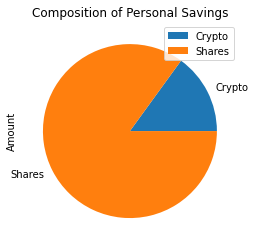

In [157]:
# Plot savings pie chart
df_savings.plot.pie(y= "Amount", title="Composition of Personal Savings")

In [158]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = crypto + shares

# Validate saving health
if savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif savings == emergency_fund: 
    print('Congratulations! You have reached your financial goal.')
else: 
    print(f'You are ${emergency_fund-savings} away from reaching your financial goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [159]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [160]:
# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [161]:
# Set number of simulations
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_cumulative_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40], 
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [162]:
# Printing the simulation input data
MC_cumulative_returns.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [163]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_cumulative_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003011,1.002297,0.999530,1.000707,1.004230,1.000194,1.004380,0.998079,1.001955,0.991282,...,1.006564,0.997825,1.003567,1.007241,1.001533,1.003635,0.991681,1.001453,1.006569,1.010227
2,1.001922,0.998083,1.006900,1.000808,0.999989,0.999206,0.995949,0.996338,1.000899,0.989392,...,1.005959,1.002047,0.999563,1.001826,1.007555,1.007605,0.994757,1.000137,1.013594,1.011690
3,0.999593,0.999109,1.007031,0.995128,1.001337,1.001502,1.000375,0.996867,0.995498,0.985667,...,0.995653,0.999132,0.996145,0.997513,0.997209,1.012596,0.989158,0.999134,1.005120,1.016049
4,0.997404,0.996245,1.019725,0.997916,1.008004,1.002297,1.003762,0.998250,1.006335,0.988394,...,0.994264,1.007311,0.992412,0.992317,1.000932,1.017738,1.000811,0.998657,1.011930,1.015466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.030322,7.684307,5.983548,9.360077,4.588317,3.179137,4.020180,2.745821,6.353942,2.090011,...,4.435312,12.549335,3.224834,3.480503,9.096482,6.121294,7.020915,5.705258,7.939050,8.255732
7557,4.044188,7.635527,5.993825,9.335685,4.603602,3.166917,4.011675,2.745771,6.381504,2.092136,...,4.438215,12.488441,3.263799,3.443883,9.112093,6.078759,7.007140,5.712004,7.941979,8.268616
7558,4.035839,7.615173,6.035500,9.377283,4.605947,3.136487,3.965259,2.752586,6.363602,2.079741,...,4.445868,12.530404,3.264205,3.436356,9.092372,6.037426,6.975863,5.734101,7.894726,8.332062
7559,4.045854,7.640327,6.035246,9.384582,4.627028,3.132121,3.932729,2.762312,6.356367,2.095844,...,4.420773,12.516631,3.253727,3.393152,9.062127,6.111269,6.999076,5.757706,7.809689,8.319907


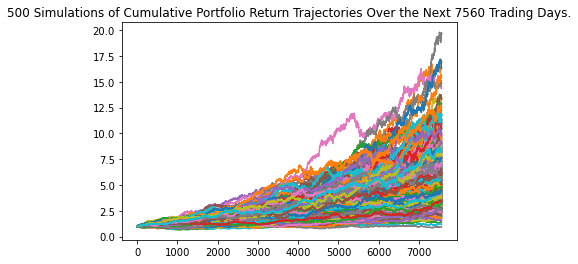

In [164]:
# Plot simulation outcomes
line_plot = MC_cumulative_returns.plot_simulation()

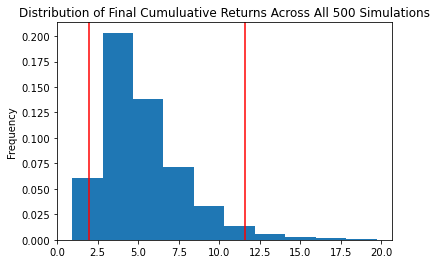

In [166]:
# Plot probability distribution and confidence intervals
dist_plot = MC_cumulative_returns.plot_distribution()

### Retirement Analysis

In [167]:
# Fetch summary statistics from the Monte Carlo simulation results
cumulative_returns_tbl = MC_cumulative_returns.summarize_cumulative_return()

# Print summary statistics
print(cumulative_returns_tbl)

count           500.000000
mean              5.330855
std               2.570627
min               0.923460
25%               3.576574
50%               4.689814
75%               6.491278
max              19.711342
95% CI Lower      1.958879
95% CI Upper     11.598069
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [168]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(cumulative_returns_tbl[8]*20000,2)
ci_upper = round(cumulative_returns_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39177.57 and $231961.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [21]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(cumulative_returns_tbl[8]*20000 *1.5,2)
ci_upper = round(cumulative_returns_tbl[9]*20000 *1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72058.75 and $881126.03


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [169]:
# Set number of simulations
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_cumulative_returns_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [170]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_cumulative_returns_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985624,1.010640,1.000849,1.000557,0.998374,0.996539,1.013419,0.986053,1.019249,1.019710,...,0.992647,1.000103,1.000284,1.012963,0.975893,0.992092,1.003687,0.989425,0.993322,1.006612
2,0.966486,0.999388,1.003507,1.001825,1.015354,0.992235,1.007287,0.993665,0.998581,1.031289,...,0.996541,1.009602,1.001974,0.996854,0.971904,1.016047,1.022105,0.985204,1.005646,1.011255
3,0.970851,1.006121,1.011422,1.003431,1.015883,0.989124,0.996519,0.991516,0.983474,1.026876,...,1.002478,1.011068,0.994367,0.994373,0.957337,0.993718,1.010323,0.983361,1.007620,1.018998
4,0.960218,1.013180,1.006788,1.003701,1.033780,1.006749,0.994487,0.993020,0.996308,1.034417,...,1.002394,0.999206,0.994431,0.997500,0.962574,0.978397,1.016987,0.985750,1.017087,1.021135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.756490,1.633259,2.609854,2.207038,1.581626,1.839914,1.006795,1.874663,1.033849,2.697481,...,1.678715,1.270373,1.225078,1.461329,1.572275,1.406131,1.146192,1.352478,1.573569,1.755531
1257,1.751368,1.644172,2.618634,2.214972,1.575331,1.858798,1.019895,1.863008,1.040957,2.710553,...,1.673241,1.266014,1.230019,1.466718,1.591414,1.405741,1.146672,1.349488,1.575027,1.765956
1258,1.789670,1.650646,2.685069,2.217160,1.576050,1.815978,1.018973,1.862191,1.041524,2.742925,...,1.645174,1.272446,1.241770,1.478428,1.601257,1.402757,1.149683,1.355238,1.567961,1.773146
1259,1.795998,1.644659,2.632697,2.191468,1.615927,1.824909,1.027491,1.842153,1.033205,2.749438,...,1.638609,1.288922,1.220692,1.465253,1.598492,1.421606,1.136267,1.353227,1.552532,1.784335


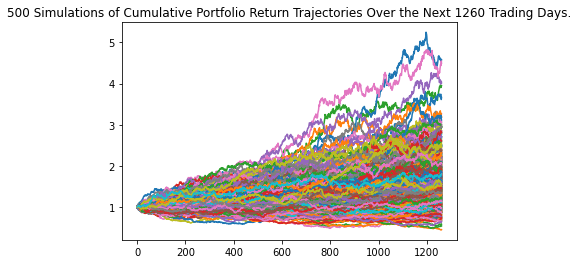

In [171]:
# Plot simulation outcomes
line_plot_five = MC_cumulative_returns_five.plot_simulation()

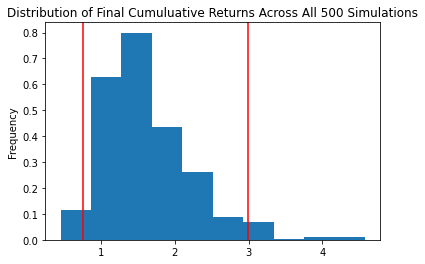

In [172]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_cumulative_returns_five.plot_distribution()

In [173]:
# Fetch summary statistics from the Monte Carlo simulation results
cumulative_returns_tbl_five = MC_cumulative_returns_five.summarize_cumulative_return()

# Print summary statistics
print(cumulative_returns_tbl_five)

count           500.000000
mean              1.618378
std               0.590238
min               0.448833
25%               1.211855
50%               1.533422
75%               1.902474
max               4.577095
95% CI Lower      0.748988
95% CI Upper      2.986413
Name: 1260, dtype: float64


In [174]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(cumulative_returns_tbl_five[8]*60000,2)
ci_upper_five = round(cumulative_returns_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $44939.31 and $179184.77


### Ten Years Retirement Option

In [175]:
# Set number of simulations
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_cumulative_returns_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [176]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_cumulative_returns_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.963452,1.010728,1.005976,0.997686,0.998132,0.998295,1.012666,1.012622,1.012149,0.996356,...,0.997016,0.999555,0.998140,0.997855,1.004559,1.001937,0.995225,1.005247,0.999132,0.995659
2,0.978710,1.011158,1.021254,1.011463,0.993389,0.987555,1.007977,1.017121,1.022117,0.984804,...,0.983797,0.999753,0.993986,0.990941,0.992019,0.979919,1.005500,0.987269,1.003709,1.001495
3,0.996760,1.010743,1.029788,1.001985,0.989127,0.999581,1.002420,1.016356,1.024835,0.980093,...,0.980299,0.993997,0.986136,0.981402,1.007060,0.990737,1.001306,0.976212,1.011989,1.007502
4,1.001618,1.003044,1.026340,1.008517,0.978651,0.996791,1.001781,1.019992,1.018794,0.970890,...,0.978742,1.002962,1.002785,0.969735,1.008568,0.982421,1.006525,0.964612,1.019931,1.026447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.969097,3.099461,2.633743,1.519837,2.954929,4.439200,1.704251,1.919189,1.674480,3.307063,...,3.433136,1.294002,3.223446,4.782324,0.938907,1.806331,3.074366,2.089236,1.763789,1.920756
2517,0.959646,3.114018,2.593006,1.514724,2.949706,4.439177,1.706359,1.931345,1.693400,3.312163,...,3.461023,1.295008,3.192082,4.823656,0.937949,1.834190,3.065380,2.095655,1.769957,1.931783
2518,0.968834,3.098161,2.607245,1.533583,2.947388,4.458891,1.733267,1.928047,1.695050,3.376057,...,3.433489,1.277540,3.217167,4.818287,0.949722,1.818613,3.086311,2.092643,1.757030,1.937103
2519,0.975863,3.114441,2.651106,1.543464,3.037263,4.441130,1.742774,1.946221,1.673818,3.370377,...,3.404520,1.263306,3.215412,4.828164,0.936074,1.819493,3.093376,2.096710,1.761468,1.942009


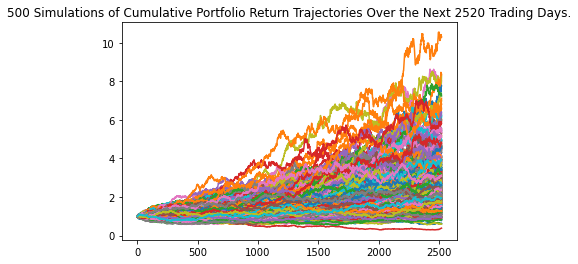

In [177]:
# Plot simulation outcomes
line_plot_ten = MC_cumulative_returns_ten.plot_simulation()

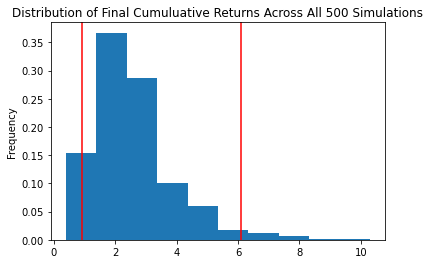

In [178]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_cumulative_returns_ten.plot_distribution()

In [179]:
# Fetch summary statistics from the Monte Carlo simulation results
cumulative_returns_tbl_ten = MC_cumulative_returns_ten.summarize_cumulative_return()

# Print summary statistics
print(cumulative_returns_tbl_ten)

count           500.000000
mean              2.582831
std               1.337144
min               0.386452
25%               1.703428
50%               2.337571
75%               3.136415
max              10.305834
95% CI Lower      0.920889
95% CI Upper      6.110532
Name: 2520, dtype: float64


In [180]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(cumulative_returns_tbl_ten[8]*60000,2)
ci_upper_ten = round(cumulative_returns_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $55253.36 and $366631.95
